In [1]:
import numpy as np
import math
import cmath


#numero de pasos
niteraciones=200

#inicializar
h=0.1
N=500
nc=N/4
M=N-1
alpha=np.zeros(M,dtype=complex)
beta=np.zeros((M,niteraciones),dtype=complex)
chi=np.zeros((M,niteraciones),dtype=complex)
phi=np.zeros((N,niteraciones+1),dtype=complex)
k0=2*math.pi*nc/N+0*1j
s=0.25*k0*k0+0*1j
v=np.zeros(N,dtype=complex)
#norma=np.zeros(niteraciones)
#phi2=np.zeros((N,N),dtype=complex)
#for i in range(N):
    #phi[i][0]=cmath.exp(1j*k0*i)*cmath.exp(-8*((4*i-N)**2)/(N*N))
lambd=1

#phi= [[cmath.exp(1j*k0*i)*cmath.exp(-8*((4*i-N)**2)/(N*N)) if i==0 else 0 for i in range(niteraciones+1)] for i in range(N)]
for j in range(N-1):
    phi[j][0]=cmath.exp(1j*k0*j)*cmath.exp((-8*(4*j-n)**2)/(100*100))
print(phi)

v = [lambd*k0**2 if (j>=2*N/5) & (j<=3*N/5) else 0 for j in range(N)]
f=open("schrodinger_data.dat","w")
g=open("norma.txt","w")
#print(phi) 
#print(v)        
phi[0][0]=0
phi[N-1][0]=0
       
for j in range(M-1):
    alpha[M-2-j]=-1/(-2+2*1j/s-v[M-1-j]+alpha[M-1-j])

for n in range(niteraciones):  
    norma=0
    for j in range (M-1):
        beta[M-2-j][n]=(4*1j*phi[M-1-j][n]/s-beta[M-1-j][n])/(-2+2*1j/s-v[M-1-j]+alpha[M-1-j])
    
    for j in range (M-1):
        chi[j+1][n]=alpha[j]*chi[j][n]+beta[j][n]
   
    for j in range(N-1):
        phi[j][n+1]=chi[j][n]-phi[j][n]
        print(j,",",(phi[j][n]*phi[j][n].conjugate()).real,file=f)
    
    print("",file=f)   
   
    for j in range(N-1):
        norma=norma+(phi[j][n]*phi[j][n].conjugate()).real
    print(norma,file=g)
    
f.close()
g.close()

NameError: name 'n' is not defined

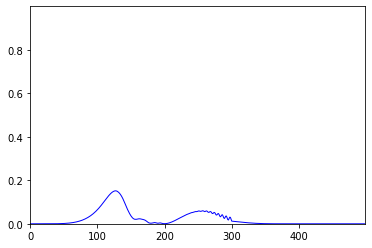

In [147]:
# ================================================================================
# ANIMACION SCHRÖDINGER
#
# Genera una animación a partir de un fichero de datos con la funcion de
# onda en cada instante de tiempo
# 
# El fichero debe estructurarse de la siguiente forma:
# 
#   x1_1, f1_1, g1_1, ... 
#   x2_1, f2_1, g2_1, ... 
#   (...)                
#   xN_1, fN_1, gN_1, ... 
#
#   x1_2, f1_2, g1_2, ... 
#   x2_2, f2_2, g2_2, ... 
#   (...)                
#   xN_2, fN_2, gN_2, ... 
#
#   x1_3, f1_3, g1_3, ... 
#   x2_3, f2_3, g2_3, ... 
#   (...)
#   xN_3, fN_3, gN_3, ... 
#   
#   (...)
#
# donde fi_j, gi_j es el valor en el nodo i-ésimo y el instante j-ésimo 
# de las funciones a representar, mientras que xi_j es la posición de
# dicho nodo. Se pueden representar un número arbitrario de funciones.
#
# El programa asume que el número de nodos no cambia a lo largo del tiempo.
# 
# Si solo se especifica un instante de tiempo, se genera una imagen en pdf
# en lugar de una animación
#
# Se puede configurar la animación cambiando el valor de las variables
# de la sección "Parámetros"
#
# ================================================================================

# Importa los módulos necesarios
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
import io

# Parámetros
# ========================================
file_in = "schrodinger_data.dat" # Nombre del fichero de datos
file_out = "schrodinger" # Nombre del fichero de salida (sin extensión)
interval = 100 # Tiempo entre fotogramas en milisegundos
save_to_file = True # False: muestra la animación por pantalla,
                     # True: la guarda en un fichero
dpi = 150 # Calidad del vídeo de salida (dots per inch)


# Lectura del fichero de datos
# ========================================
# Lee el fichero a una cadena de texto
with open(file_in, "r") as f:
    data_str = f.read()

# Inicializa la lista con los datos de cada fotograma.
# frames_data[j] contiene los datos del fotograma j-ésimo
frames_data = list()

# Itera sobre los bloques de texto separados por líneas vacías
# (cada bloque corresponde a un instante de tiempo)
for frame_data_str in data_str.split("\n\n"):
    # Almacena el bloque en una matriz
    # (io.StringIO permite leer una cadena de texto como si fuera un
    # fichero, lo que nos permite usar la función loadtxt de numpy)
    if len(frame_data_str) > 0:
        frame_data = np.loadtxt(io.StringIO(frame_data_str), delimiter=",").T

        # Añade los datos del fotograma (la configuración del sistema)
        # a la lista
        frames_data.append(frame_data)

# Almacena toda la información en un arrary de numpy
frames_data = np.array(frames_data)

# Creación de la animación/gráfico
# ========================================
# Crea los objetos figure y axis
fig, ax = plt.subplots(figsize=[6, 4])

# Define el rango de los ejes
xmin = np.amin(frames_data[0][0])
xmax = np.amax(frames_data[0][0])
ymin = np.amin(frames_data[:,1:])
ymax = np.amax(frames_data[:,1:])
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

# Representa el primer fotograma
xs = frames_data[0][0]
lines = list()
for ys in frames_data[0][1:]:
    # Info sobre la función plot: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)
    line, = ax.plot(xs, ys, "-", color="blue", linewidth=1)
    lines.append(line)
 
# Función que actualiza las curvas en la animación 
def update(j_frame, frames_data, lines):
    xs = frames_data[j_frame][0]

    # Itera sobre las diferentes curvas
    for j_curve, ys in enumerate(frames_data[j_frame][1:]):
        # Actualiza la curva
        lines[j_curve].set_data(xs, ys)

    return lines

# Calcula el nº de frtogramas o instantes de tiempo
nframes = len(frames_data)

# Si hay más de un instante de tiempo, genera la animación
if nframes > 1:
    animation = FuncAnimation(
            fig, update,
            fargs=(frames_data, lines), frames=len(frames_data), blit=True, interval=interval)

    # Muestra por pantalla o guarda según parámetros
    if save_to_file:
        animation.save("{}.mp4".format(file_out), dpi=dpi)
    else:
        plt.show()
# En caso contrario, muestra o guarda una imagen
else:
    # Muestra por pantalla o guarda según parámetros
    if save_to_file:
        fig.savefig("{}.pdf".format(file_out))
    else:
        plt.show()